In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [ ]:
df = pd.read_excel('/content/sfd_2017_2018_2019.xlsx')
df

,date,Max\nTemp (°C),Min\nTemp (°C),RH 0830\nIST%,RH 1730\nIST%,MW
0,2017-01-01,20.3,9.2,100,80,3536.238770
1,2017-01-02,23.2,9.3,100,82,3639.738770
2,2017-01-03,24.3,9.5,100,77,3673.321289
3,2017-01-04,24.0,8.9,97,66,3898.860840
4,2017-01-05,25.2,10.4,97,71,3547.965820
...,...,...,...,...,...,...
1090,2019-12-27,13.4,4.2,86,76,4976.180664
1091,2019-12-28,14.4,2.4,100,83,4708.879395
1092,2019-12-29,13.3,3.1,94,79,4831.750488
1093,2019-12-30,15.8,2.6,100,97,5298.331055


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True) #set date as index
df.head()

,Max\nTemp (°C),Min\nTemp (°C),RH 0830\nIST%,RH 1730\nIST%,MW
date,,,,,
2017-01-01,20.3,9.2,100,80,3536.238770
2017-01-02,23.2,9.3,100,82,3639.738770
2017-01-03,24.3,9.5,100,77,3673.321289
2017-01-04,24.0,8.9,97,66,3898.860840
2017-01-05,25.2,10.4,97,71,3547.965820


In [ ]:
df.columns

Index(['Max\nTemp (°C)', 'Min\nTemp (°C)', 'RH 0830\nIST%', 'RH 1730\nIST%',
       'MW'],
      dtype='object')

Fitting model

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(df['MW'], order=(1,0,5))
# result_AR = model.fit(disp = 0)
# plt.plot(df_log_diff)
# plt.plot(result_AR.fittedvalues, color='red')
# plt.title("sum of squares of residuals")
# print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["MW"])**2))

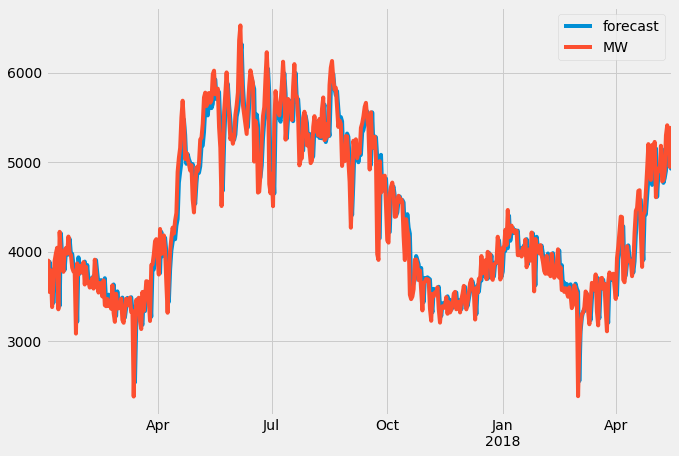

In [ ]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=300)

LSTM

RNN

All these models are for the purpose of prediction  

# Model-2

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, Dense,Dropout,LSTM,Activation, RepeatVector, SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/sfd_2017_2018_2019.xlsx')
df.head()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
#df.set_index('DATE', inplace=True) #set date as index
df.head()

In [ ]:
df['date'] = pd.to_datetime(df.date).dt.tz_localize(None)

In [ ]:
for i in range(len(df)):
  df['date'][i]=df['date'][i].timestamp()

In [ ]:
df = df.astype('float32')

In [ ]:
y=df.MW.values
x=df.drop(['MW'],axis=1)

In [ ]:

X_train=x[0:730]
X_test=x[730:1095]
Y_train=y[0:730]
Y_test=y[730:1095]

In [ ]:
Y_train.shape

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(LSTM(40, return_sequences=True, input_shape=(X_train.shape[1],1))))
model.add(Bidirectional(LSTM(20,return_sequences= False, activation= 'linear')))
model.add(tf.keras.layers.Dropout(0.5))

model.add(Dense(1))
# model.add(layers.LSTM(256))

model.compile(loss='MSE', optimizer = 'adam')
hist = model.fit(X_train, Y_train, epochs=10, batch_size=1000)
model.summary()

In [ ]:
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("mean sequare error = ",mse)

In [ ]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16, 4))
    plt.plot(test, color='blue', label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='red', label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()


plot_predictions(y_test, pred, "Predictions made by model")

# Model-3

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
df = pd.read_excel('/content/sfd_2017_2018_2019.xlsx')
df.head()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
#df.set_index('DATE', inplace=True) #set date as index
df.head()

In [ ]:
df['date'] = pd.to_datetime(df.date).dt.tz_localize(None)
for i in range(len(df)):
  df['date'][i]=df['date'][i].timestamp()
df = df.astype('float32')
y=df.MW.values
x=df.drop(['MW'],axis=1)
X_train=x[0:730]
X_test=x[730:1095]
Y_train=y[0:730]
Y_test=y[730:1095]

In [ ]:
# build LSTM model
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

# train LSTM model
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, Y_train, epochs=10, batch_size=1000)

In [ ]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

In [ ]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

In [ ]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")